# K-Means Clustering and Principal Component Analysis algorithms:

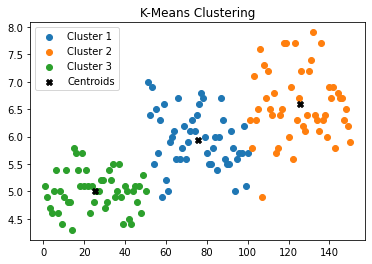

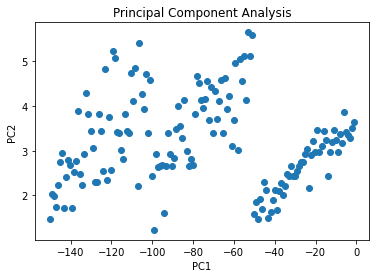

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def k_means_clustering(dataset, num_clusters):
    # Initialize centroids randomly
    centroids = dataset[np.random.choice(range(len(dataset)), num_clusters, replace=False)]

    # Loop until convergence
    while True:
        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(num_clusters)]
        for point in dataset:
            distances = np.linalg.norm(centroids - point, axis=1)
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])

        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break

        centroids = new_centroids

    # Return the final clusters and centroids
    return clusters, centroids

def principal_component_analysis(dataset, num_components):
    # Calculate the covariance matrix
    cov_matrix = np.cov(dataset.T)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top-k eigenvectors (principal components)
    principal_components = sorted_eigenvectors[:, :num_components]

    # Transform the dataset to the new feature space
    transformed_data = np.dot(dataset, principal_components)

    # Return the transformed dataset and explained variance ratios
    explained_variance_ratios = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    return transformed_data, explained_variance_ratios

# Load the Iris dataset
dataset = pd.read_csv('Iris Dataset.csv')
dataset = dataset.drop('Species', axis=1)  # Remove the 'species' column
dataset = dataset.values  # Convert to NumPy array

# Perform K-Means Clustering
clusters, centroids = k_means_clustering(dataset, num_clusters=3)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Perform Principal Component Analysis
transformed_data, explained_variance_ratios = principal_component_analysis(dataset, num_components=2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()